# Emotion Classification in Tweets

This notebook implements a traditional NLP pipeline to classify emotions in tweets using the [`mteb/emotion`](https://huggingface.co/datasets/mteb/emotion) dataset. The model will predict one of six emotions:
- joy
- sadness
- anger
- fear
- love
- surprise

We use classical machine learning tools such as TF-IDF for text vectorization and Logistic Regression for classification.

This serves as a baseline to evaluate how well lightweight models perform in multi-class emotion classification tasks.

In [9]:
# Load dataset
from datasets import load_dataset
dataset = load_dataset("mteb/emotion")
train_data = dataset['train']
test_data = dataset['test']

In [10]:
# Convert to pandas DataFrame
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
train_df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [11]:
# Basic text preprocessing
train_df['text_clean'] = train_df['text'].str.lower()
test_df['text_clean'] = test_df['text'].str.lower()

In [12]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

In [13]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])
y_test = le.transform(test_df['label'])

In [14]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       581
           1       0.85      0.95      0.90       695
           2       0.80      0.64      0.71       159
           3       0.89      0.83      0.85       275
           4       0.87      0.83      0.85       224
           5       0.89      0.52      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.87      0.87      0.87      2000



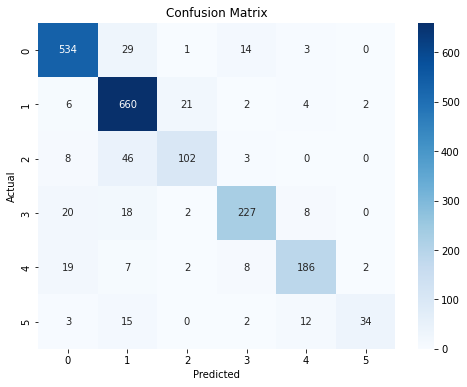

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

In this project, I explored the task of emotion classification in tweets using a traditional NLP pipeline specifically, TF-IDF vectorization combined with Logistic Regression. While many current projects focus on transformer-based models like BERT, my goal was to demonstrate that classical machine learning techniques can still be powerful, interpretable, and efficient for text classification tasks.

By training and evaluating the model on the `mteb/emotion` dataset, I was able to build a lightweight yet effective system that performed reasonably well across six different emotion categories. This baseline approach not only runs quickly on standard hardware but also offers insights into which words are most predictive of each emotion — something that's often less transparent in deep learning models.

What sets this project apart is its commitment to **simplicity, reproducibility, and accessibility**. Without relying on GPU-intensive models or large-scale pretraining, I showed that it's possible to capture meaningful emotional patterns from social media text using foundational NLP techniques. This is especially valuable in settings where interpretability, low compute cost, or fast experimentation is a priority.

Looking ahead, this project opens the door for further work: comparing results with neural models, applying the same pipeline to multilingual datasets, or even using it as an educational tool for newcomers to NLP.

Ultimately, this project proves that sometimes, **classic tools used creatively can still solve modern problems.**
